<a href="https://colab.research.google.com/github/Achuan-2/Deep-Leaning/blob/main/mnist_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# 初学者的 TensorFlow 2.0 教程

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://tensorflow.google.cn/tutorials/quickstart/beginner"><img src="https://tensorflow.google.cn/images/tf_logo_32px.png" />在 TensorFlow.org 观看</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/zh-cn/tutorials/quickstart/beginner.ipynb"><img src="https://tensorflow.google.cn/images/colab_logo_32px.png" />在 Google Colab 运行</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/zh-cn/tutorials/quickstart/beginner.ipynb"><img src="https://tensorflow.google.cn/images/GitHub-Mark-32px.png" />在 GitHub 查看源代码</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/zh-cn/tutorials/quickstart/beginner.ipynb"><img src="https://tensorflow.google.cn/images/download_logo_32px.png" />下载笔记本</a>
  </td>
</table>

下载并安装 TensorFlow 2.0 测试版包。将 TensorFlow 载入你的程序：

In [1]:
# 安装 TensorFlow
# 导入包
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


载入并准备好 [MNIST 数据集](http://yann.lecun.com/exdb/mnist/)。将样本从整数转换为浮点数：

In [2]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels)= mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

In [5]:
train_labels.shape

(60000,)

In [6]:
train_labels[0]

5

In [7]:
# train_images[0]

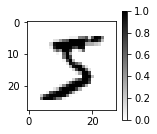

In [8]:
plt.figure(figsize=(2,2))
plt.imshow(train_images[0],cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

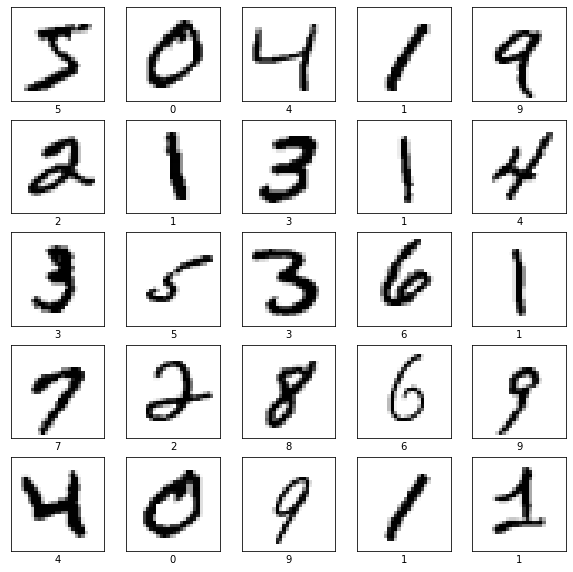

In [9]:
#显示训练集中的前 25 个图像，并在每个图像下方显示类名称。
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # plt.imshow(train_images[i], cmap=plt.cm.ocean)
    plt.xlabel(train_labels[i])
plt.show()

## 基本模型

将模型的各层堆叠起来，以搭建 `tf.keras.Sequential` 模型。为训练选择优化器和损失函数：

In [10]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

训练并验证模型：

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.fit(train_images, train_labels, epochs=10)

model.evaluate(test_images,  test_labels, verbose=2)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0649 - accuracy: 0.9794
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0575 - accuracy: 0.9810
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0522 - accuracy: 0.9832
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0473 - accuracy: 0.9842
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0414 - accuracy: 0.9867
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0406 - accuracy: 0.9864
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0377 - accuracy: 0.9874
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0372 - accuracy: 0.9873
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0335 - accuracy: 0.9886
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.032

[0.07687707990407944, 0.9800999760627747]

现在，这个照片分类器的准确度已经达到 97%。想要了解更多，请阅读 [TensorFlow 教程](https://tensorflow.google.cn/tutorials/)。

In [13]:
# 如果直接进行预测
predictions = model.predict(test_images)
predictions[0]

array([9.3702226e-08, 3.8439238e-09, 1.0153235e-05, 4.0473364e-04,
       9.8371127e-13, 2.0263921e-07, 1.1544606e-14, 9.9956685e-01,
       1.1443450e-07, 1.7788989e-05], dtype=float32)

softmax 
$$
S_{i}=\frac{e^{i}}{\sum_{j} e^{j}}
$$

In [14]:
# 在原有模型基础上附加一个 softmax  层，将 logits 转换成更容易理解的概率。
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

array([0.08534218, 0.08534217, 0.08534303, 0.08537671, 0.08534217,
       0.08534218, 0.08534217, 0.2318836 , 0.08534218, 0.08534368],
      dtype=float32)

In [15]:
np.argmax(predictions[0])

7

In [16]:
# 图片绘制函数
def plot_image(i, predictions_array, label_array, img_array):
  predictions_array, true_label, img = predictions_array[i], label_array[i], img_array[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

# 概率绘制
def plot_value_array(i, predictions_array, label_array):
  predictions_array, true_label = predictions_array[i], label_array[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

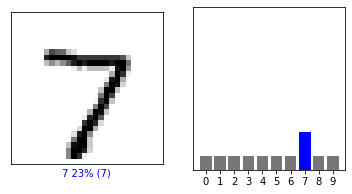

In [17]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

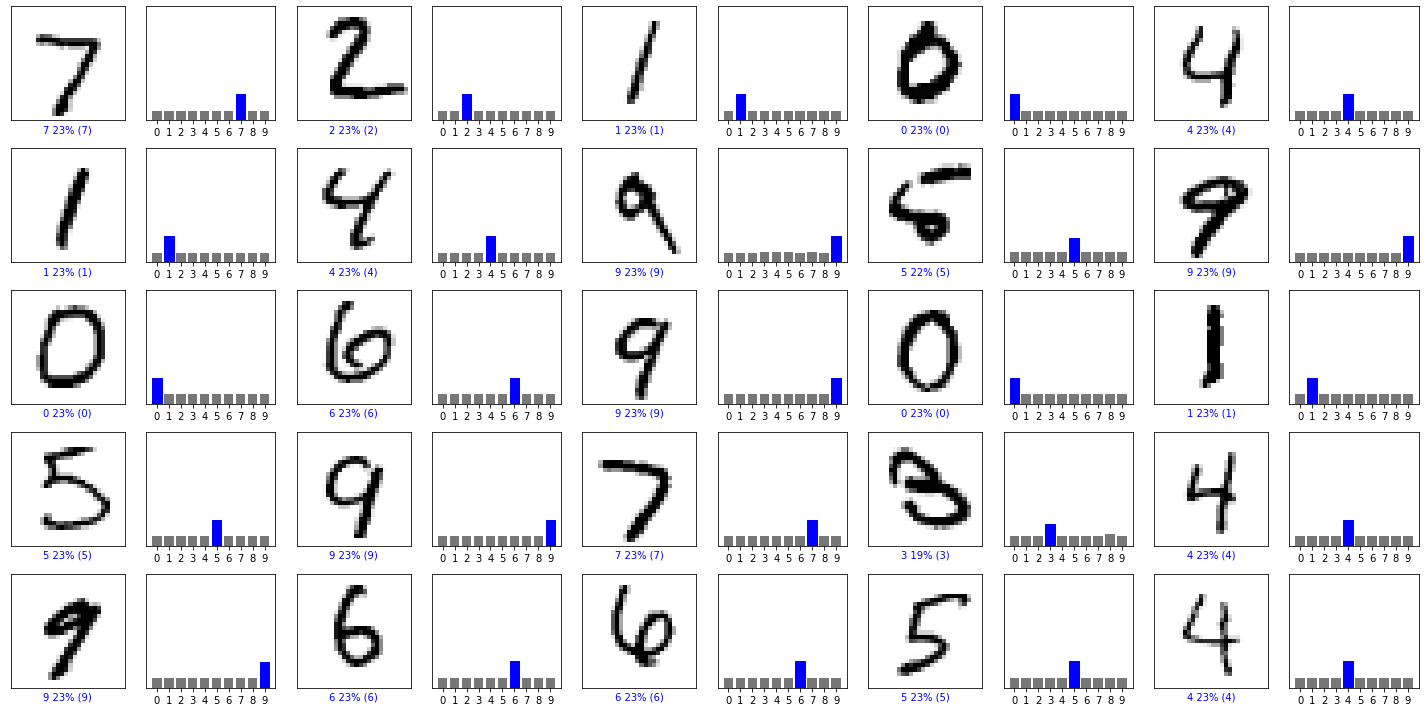

In [18]:
# 预测结果可视化
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.tight_layout()
plt.show()

In [19]:
# 直接分析结果函数
def predict_result(i, predictions_array, label_array, img_array,right_array,error_array):
    predictions_array, true_label, img = predictions_array[i], label_array[i], img_array[i]
    predicted_label = np.argmax(predictions_array)
    message="序号{}\t 预测为{}\t概率{:2.0f}%\t实际是 ({})".format(i,predicted_label,
                                100*np.max(predictions_array),true_label)

    if predicted_label == true_label:
        # print(message,"\t预测成功！")
        right_array.append(message)
    else:
        # print(message,"\t预测失败！")
        error_array.append(message)

right_array=[]
error_array=[]
num_images=10000
for i in range(num_images):
    predict_result(i, predictions, test_labels, test_images,right_array,error_array)

In [20]:
print(error_array)
print(len(error_array))

['序号151\t 预测为8\t概率21%\t实际是 (9)', '序号247\t 预测为6\t概率16%\t实际是 (4)', '序号274\t 预测为3\t概率15%\t实际是 (9)', '序号320\t 预测为1\t概率13%\t实际是 (9)', '序号321\t 预测为7\t概率20%\t实际是 (2)', '序号340\t 预测为3\t概率20%\t实际是 (5)', '序号381\t 预测为7\t概率15%\t实际是 (3)', '序号445\t 预测为0\t概率23%\t实际是 (6)', '序号448\t 预测为3\t概率14%\t实际是 (9)', '序号495\t 预测为0\t概率20%\t实际是 (8)', '序号582\t 预测为2\t概率19%\t实际是 (8)', '序号610\t 预测为6\t概率16%\t实际是 (4)', '序号613\t 预测为8\t概率15%\t实际是 (2)', '序号619\t 预测为8\t概率16%\t实际是 (1)', '序号659\t 预测为1\t概率19%\t实际是 (2)', '序号684\t 预测为3\t概率21%\t实际是 (7)', '序号691\t 预测为4\t概率20%\t实际是 (8)', '序号717\t 预测为6\t概率20%\t实际是 (0)', '序号720\t 预测为8\t概率23%\t实际是 (5)', '序号740\t 预测为9\t概率19%\t实际是 (4)', '序号810\t 预测为2\t概率15%\t实际是 (7)', '序号844\t 预测为7\t概率15%\t实际是 (8)', '序号947\t 预测为9\t概率20%\t实际是 (8)', '序号951\t 预测为4\t概率18%\t实际是 (5)', '序号956\t 预测为2\t概率16%\t实际是 (1)', '序号1014\t 预测为5\t概率22%\t实际是 (6)', '序号1039\t 预测为2\t概率14%\t实际是 (7)', '序号1044\t 预测为8\t概率17%\t实际是 (6)', '序号1107\t 预测为3\t概率20%\t实际是 (9)', '序号1112\t 预测为6\t概率23%\t实际是 (4)', '序号1156\t 预测为8\t概率17%\t实际是 (7)', '

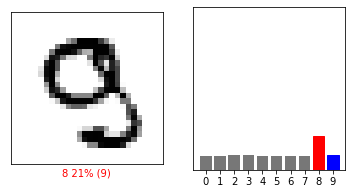

In [21]:
# 检查预测失败的图
i = 151
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

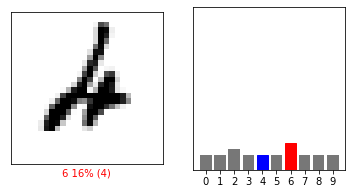

In [22]:
i = 247
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

## 卷积神经网络

In [23]:

model_c = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(14, (3, 3), activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10,activation='softmax')
])


[使用CNN时报错，ValueError: Input 0 of layer sequential is incompatible with the layer](https://blog.csdn.net/ghedhrjeerdjh/article/details/114540102)

In [24]:
# 增加维度到4维
train_images_4 = train_images.reshape((60000, 28, 28, 1))
test_images_4 = test_images.reshape((10000, 28, 28, 1))

In [25]:
train_images.shape

(60000, 28, 28)

In [27]:

model_c.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model_c.fit(train_images_4, train_labels, epochs=5, 
                    validation_data=(test_images_4, test_labels))

Epoch 1/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.4231 - accuracy: 0.8641 - val_loss: 0.0577 - val_accuracy: 0.9804
Epoch 2/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0644 - accuracy: 0.9796 - val_loss: 0.0506 - val_accuracy: 0.9845
Epoch 3/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0454 - accuracy: 0.9860 - val_loss: 0.0389 - val_accuracy: 0.9866
Epoch 4/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0352 - accuracy: 0.9888 - val_loss: 0.0327 - val_accuracy: 0.9898
Epoch 5/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0276 - accuracy: 0.9911 - val_loss: 0.0284 - val_accuracy: 0.9904


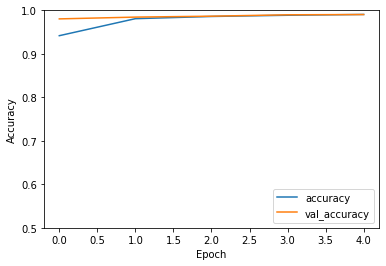

In [28]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()



In [29]:
test_loss, test_acc = model_c.evaluate(test_images_4,  test_labels, verbose=2)
print(test_acc)

313/313 - 3s - loss: 0.0284 - accuracy: 0.9904
0.9904000163078308


In [ ]:
# 将整个模型另存为 SavedModel。
!mkdir -p saved_model
model.save('saved_model/my_model')